In [ ]:
pip install praw nltk spacy rake-nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 5.7 MB/s eta 0:00:00


In [ ]:
pip install bertopic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 36.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.1 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039166 sha256=f6fbb27c1fbca9bf284b949c8ed8e8880679f725252cc010cec27150ed7607e4
  Stored in dir

In [ ]:
pip install pandas yake rake-nltk summa keybert


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 778.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.1 MB/s eta 0:00:00
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54388 sha256=a8e59f74a358b6abbb5dcdc0d91c9af0865e48dc15cb21aa45bd5507a3304f87
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
  Created wheel for keybert: filename=keybert-0.8.3-py3-none-any.whl size=39126 sha256=f183b0707eaa8b4a2f413832c9a1f6ba0e499e9792d1f4df84981a44367e8896
  Stored in directory: /root/.cache/pip/wheels/70/88/07/1a3bc11fd1dd5f89924a02dcbca89a3015e25e8faa31f904dc
Successfully built summa keybert


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from rake_nltk import Rake
from collections import Counter
from wordcloud import WordCloud
from transformers import pipeline
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
#wordvec
from gensim.models import Word2Vec
#kemans
from sklearn.cluster import KMeans
#LDA
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
bc_whole_df = pd.read_csv("/content/breast_cancer_merged.csv")
bc_whole_df.head()

,id,name,title,selftext,num_comments,score_x,score_y,body,controversiality
0,nrcy0,t3_nrcy0,I'm cycling 4000 miles this summer to raise mo...,I'm doing this mostly for my mom who was diagn...,2,3.0,2,I love this idea. You should repost this in a...,0
1,qls70,t3_qls70,How did your hair grow back after chemotherapy?,I am just curious.... what happened to your ha...,3,2.0,2,"Mine was originally thick, wavy and red-brown....",0
2,qls70,t3_qls70,How did your hair grow back after chemotherapy?,I am just curious.... what happened to your ha...,3,2.0,2,"My mom always had coarse, thick, wavy hair. A...",0
3,qnpht,t3_qnpht,33yo Male...,"Hey everyone, I'm a 33yo male, and my left nip...",10,2.0,5,"Honestly, the internet was my worst enemy at t...",0
4,qnpht,t3_qnpht,33yo Male...,"Hey everyone, I'm a 33yo male, and my left nip...",10,2.0,1,"Breast cancer in men is quite common, more tha...",0


In [ ]:
columns_to_include = ['title','selftext']
question_df = bc_whole_df[columns_to_include]
len(question_df)

65552

In [ ]:
columns_to_include = ['body']
comments_df = bc_whole_df[columns_to_include]
len(comments_df)

65552

In [ ]:
columns_to_include = ['title','body']
commentsemotion__df = bc_whole_df[columns_to_include]
len(commentsemotion__df)

65552

In [ ]:
question_df = question_df.drop_duplicates(keep='first')
len(question_df)

8546

In [ ]:
question_df.head()

,title,selftext
0,I'm cycling 4000 miles this summer to raise mo...,I'm doing this mostly for my mom who was diagn...
1,How did your hair grow back after chemotherapy?,I am just curious.... what happened to your ha...
3,33yo Male...,"Hey everyone, I'm a 33yo male, and my left nip..."
6,A bit worried about mammogram...,Hi reddit! \nNot sure this is the right place ...
7,This afternoon I will be going in for my first...,I first noticed the lump in my left breast on ...


In [ ]:
def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Removing user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)

    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return " ".join(lemmatized_tokens)

In [ ]:
#data cleaning

# Apply the cleaning function to your dataframe
question_df['cleaned_title'] = question_df['title'].apply(clean_text)

In [ ]:
commentsemotion__df['cleaned_comments'] = commentsemotion__df['body'].apply(clean_text)

<ipython-input-15-eabac6385b62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commentsemotion__df['cleaned_comments'] = commentsemotion__df['body'].apply(clean_text)


In [ ]:
commentsemotion__df['cleaned_title'] = commentsemotion__df['title'].apply(clean_text)

<ipython-input-35-3d3a7f2f1a4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commentsemotion__df['cleaned_title'] = commentsemotion__df['title'].apply(clean_text)


In [ ]:
question_df['cleaned_question'] = question_df['selftext'].apply(clean_text)

In [ ]:
question_df['cleaned_title'].head()

0    im cycling 4000 mile summer raise money cancer...
1                          hair grow back chemotherapy
3                                            33yo male
6                                bit worried mammogram
7    afternoon going first diagnostic mammogram bre...
Name: cleaned_title, dtype: object

In [ ]:
question_df['cleaned_question'].head(5)

0    im mostly mom diagnosed breast cancer septembe...
1    curious happened hair chemotherapy mine stick ...
3    hey everyone im 33yo male left nipple felt irr...
6    hi reddit sure right place ask figured people ...
7    first noticed lump left breast sunday evening ...
Name: cleaned_question, dtype: object

In [ ]:
words_to_remove = ['hi', 'hey', 'i', 'am','im','thanks','thank you']
def remove_short(text,words_to_remove):
    words = text.split()
    filtered_wrd = [word for word in words if words not in words_to_remove]
    return ' '.join(filtered_wrd)

In [ ]:
question_df['cleaned_question'] = question_df['cleaned_question'].apply(lambda x: remove_short(x, words_to_remove))

In [ ]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# Assuming you have a DataFrame 'question_df' with columns 'cleaned_question' containing your cleaned data

# Combine 'cleaned_question' into a single text column
question_df['text'] = question_df['cleaned_question']

# Tokenize the text (you may need additional preprocessing)
nltk.download('punkt')
question_df['tokens'] = question_df['text'].apply(word_tokenize)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(tokens) for tokens in question_df['tokens']])

# Word2Vec Model Training
word2vec_model = Word2Vec(sentences=question_df['tokens'], vector_size=100, window=5, min_count=1, sg=0)

# TF-IDF Clustering
num_clusters = 5  # Adjust as needed
kmeans_tfidf = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_tfidf.fit(tfidf_matrix)

# Word2Vec Clustering
def document_vector(tokens):
    vectors = [word2vec_model.wv[token] for token in tokens if token in word2vec_model.wv]
    if not vectors:
        # Handle cases where all tokens are out-of-vocabulary
        return np.zeros(word2vec_model.vector_size)
    return np.mean(vectors, axis=0)

question_df['word2vec_vector'] = question_df['tokens'].apply(document_vector)

# Pad or truncate Word2Vec vectors to a fixed length
max_length = 100  # Adjust as needed
question_df['word2vec_vector'] = question_df['word2vec_vector'].apply(lambda x: np.pad(x, (0, max_length - len(x)), 'constant'))

# Perform K-Means clustering on Word2Vec vectors
kmeans_word2vec = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_word2vec.fit(list(question_df['word2vec_vector']))

# Evaluate clustering using silhouette score for TF-IDF
silhouette_avg_tfidf = silhouette_score(tfidf_matrix, kmeans_tfidf.labels_)

# Evaluate clustering using silhouette score for Word2Vec
silhouette_avg_word2vec = silhouette_score(list(question_df['word2vec_vector']), kmeans_word2vec.labels_)

print(f"Silhouette Score for TF-IDF: {silhouette_avg_tfidf:}")
print(f"Silhouette Score for Word2Vec: {silhouette_avg_word2vec:.2f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for TF-IDF: 0.00
Silhouette Score for Word2Vec: 0.09


In [ ]:
print(f"Silhouette Score for TF-IDF: {silhouette_avg_tfidf:}")
print(f"Silhouette Score for Word2Vec: {silhouette_avg_word2vec:}")

Silhouette Score for TF-IDF: 0.003336243060866807
Silhouette Score for Word2Vec: 0.09425898827731295


In [ ]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have a DataFrame 'question_df' with columns 'cleaned_question' containing your cleaned data

# Tokenize the text (you may need additional preprocessing)
nltk.download('punkt')
question_df['tokens'] = question_df['cleaned_question'].apply(word_tokenize)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=question_df['tokens'], vector_size=100, window=5, min_count=1, sg=0)

# Function to compute document vectors
def document_vector(tokens, model, vector_size):
    # Initialize an array of zeros with the same size as the word vectors
    doc_vector = np.zeros((vector_size,), dtype="float32")
    num_words = 0
    for word in tokens:
        if word in model.wv:
            doc_vector = np.add(doc_vector, model.wv[word])
            num_words += 1
    # Take the average over all word vectors in the document
    if num_words > 0:
        doc_vector = np.divide(doc_vector, num_words)
    return doc_vector

# Apply the document_vector function to create document vectors
vector_size = 100  # Should match the vector_size used when training Word2Vec
question_df['word2vec_vector'] = question_df['tokens'].apply(lambda tokens: document_vector(tokens, word2vec_model, vector_size))

# Perform K-Means clustering on Word2Vec vectors
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(list(question_df['word2vec_vector']))

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(list(question_df['word2vec_vector']), kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.09


#TFIDF


In [ ]:
tfidf_vec = TfidfVectorizer(max_df = 0.95, min_df= 2)
tfidf_title = tfidf_vec.fit_transform(question_df['cleaned_title'])
tfidf_ques = tfidf_vec.fit_transform(question_df['cleaned_question'])

#Wordvec


In [ ]:
question_df['tokenized_title'] = question_df['cleaned_title'].apply(nltk.word_tokenize)
wordvec_model_title = Word2Vec(question_df['tokenized_title'],vector_size=100,window=5,min_count=2,workers=4)

In [ ]:
import numpy as np

# Function to average word vectors for a text
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

# Average the word vectors for each document
doc_word_vector = question_df['tokenized_title'].apply(lambda x: average_word_vectors(x, wordvec_model_title, wordvec_model_title.wv.key_to_index, 100))
doc_word_vector = np.array(list(doc_word_vector))


#Keyword Extraction


In [ ]:
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
rake_nltk_var = Rake()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import pandas as pd
import yake
import keybert
from rake_nltk import Rake
from summa import keywords

# Initialize keyword extraction tools
yake_extractor = yake.KeywordExtractor()
rake_extractor = Rake()
kw_model = keybert.KeyBERT()


# # Function to extract keywords using TextRank
# def extract_keywords_textrank(text):
#     return keywords.keywords(text, scores=False).split('\n')

# Function to extract keywords using KeyBERT
def extract_keywords_keybert(text):
    return [kw[0] for kw in kw_model.extract_keywords(text)]

# Apply keyword extraction to DataFrame
def apply_keyword_extraction(df, column):

    #df['keywords_textrank'] = df[column].apply(extract_keywords_textrank)
    df['keywords_keybert'] = df[column].apply(extract_keywords_keybert)
    return df

# Apply the functions to your DataFrames
key_df = apply_keyword_extraction(question_df, 'cleaned_question')

# Display the DataFrame with extracted keywords (for example, questions)



.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
key_df['keywords_keybert'].head(30)

0         [donate, cancer, donates, chemotherapy, fund]
1                  [hair, blonde, grey, ringlet, color]
3            [lump, mammogram, nipple, swollen, cancer]
6        [mammogram, radiologist, breast, chest, lymph]
7         [lump, biopsy, mammogram, breast, ultrasound]
12         [mammogram, lump, cancer, breast, malignant]
14               [statistic, cancer, phd, breast, rate]
19            [family, cancer, mom, sister, lumpectomy]
21       [cancer, romantic, relationship, love, breast]
22    [breastcancer, cancer, breast, treatment, diag...
25         [cancer, chemo, survivor, breast, uplifting]
29             [lymph, breast, cancer, advice, support]
31                   [wig, cancer, scarf, breast, hair]
36       [cancer, writing, expense, breast, experience]
40    [increaseddecrease, carcinoma, neupogen, herce...
42               [lump, mammogram, breast, cyst, chest]
45          [ovary, ovarian, removing, removed, remove]
47                  [cancer, lump, tumor, wife, 

In [ ]:
# Flatten the list of keywords and count occurrences
all_keywords = [keyword for sublist in key_df['keywords_keybert'] for keyword in sublist]
all_keywords = [word for word in all_keywords if word not in ['cancer', 'breast']]  # Remove specific words

keyword_counts = Counter(all_keywords)

# Convert to DataFrame for easy handling
keywords_df = pd.DataFrame(keyword_counts.items(), columns=['keyword', 'count']).sort_values(by='count', ascending=False)


In [ ]:
keywords_df.head()

,keyword,count
32,chemo,1577
56,mastectomy,1236
31,diagnosed,1111
30,treatment,1041
105,surgery,1021


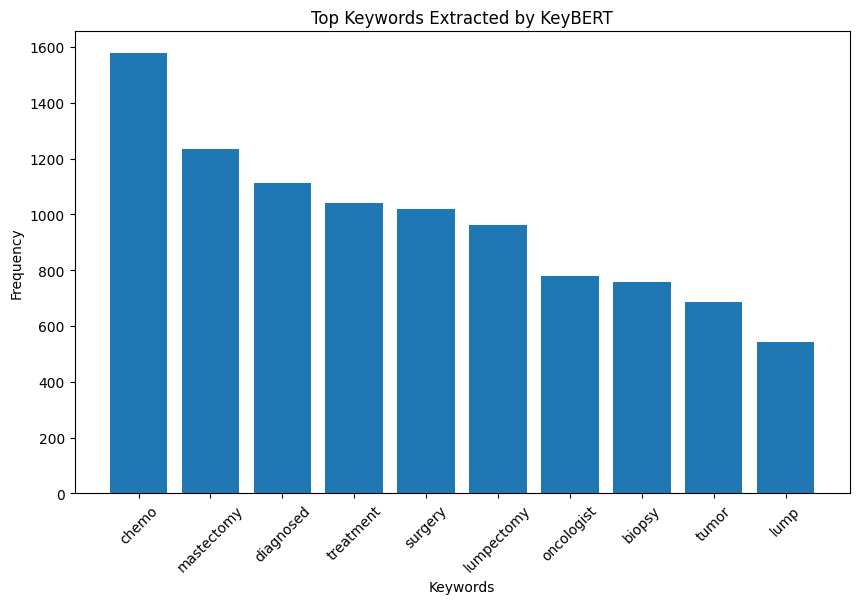

In [ ]:
# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(keywords_df['keyword'][:10], keywords_df['count'][:10])  # Top 10 keywords
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Top Keywords Extracted by KeyBERT')
plt.xticks(rotation=45)
plt.show()



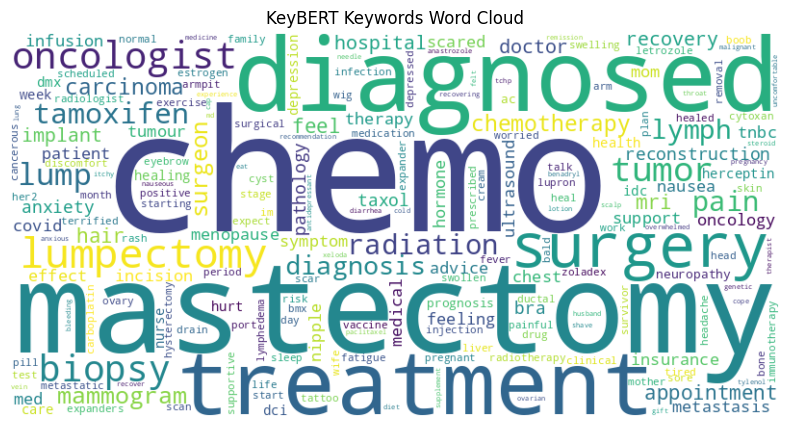

In [ ]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('KeyBERT Keywords Word Cloud')
plt.show()



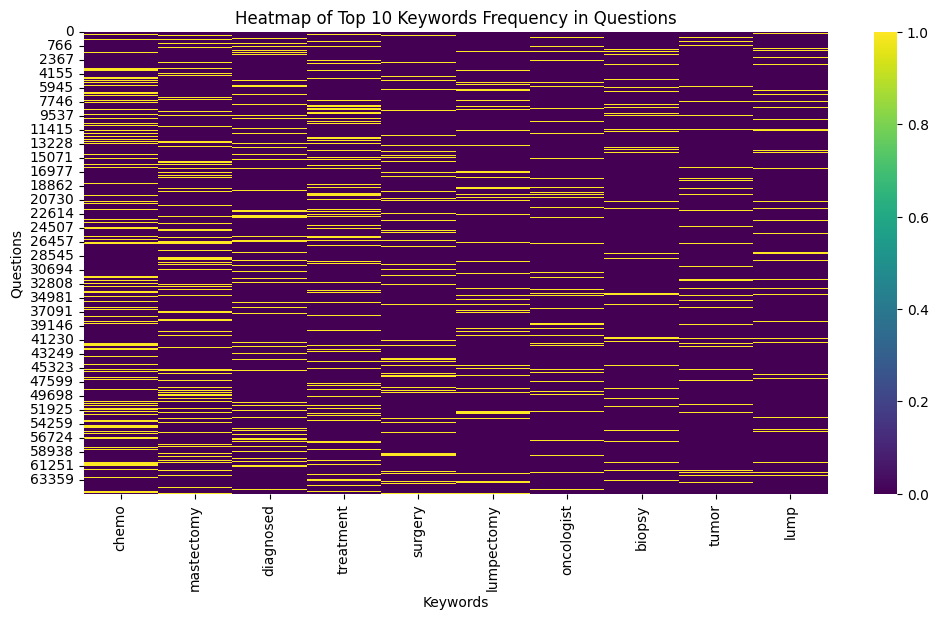

In [ ]:
import seaborn as sns

# Prepare data for heatmap
top_keywords = keywords_df['keyword'][:10].tolist()
heatmap_data = pd.DataFrame(0, index=key_df.index, columns=top_keywords)

# Populate the heatmap data
for index, row in key_df.iterrows():
    for keyword in row['keywords_keybert']:
        if keyword in top_keywords:
            heatmap_data.at[index, keyword] += 1

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Top 10 Keywords Frequency in Questions')
plt.xlabel('Keywords')
plt.ylabel('Questions')
plt.show()



#LDA

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Prepare data: treat each keyword as a document
documents = keywords_df['keyword'].tolist()

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# LDA Model
lda_model = LatentDirichletAllocation(n_components=6, random_state=0)  # 5 topics
lda_topics = lda_model.fit_transform(tfidf_matrix)

# Display top words per topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda_model, vectorizer.get_feature_names_out(), 5)



Topic 0:
obligation bandaged charger age paclitaxols
Topic 1:
article aluminum spreading hypothyroidism extension
Topic 2:
whats rehab planning detect ac
Topic 3:
private saline wiglike nsaid 32525
Topic 4:
taxolabraxanecarbokeytruda seeing quitting mucinosis whining
Topic 5:
tolerance rick cogent step crab


In [ ]:
# Combine keywords into a single string per row
key_df['combined_keywords'] = key_df['keywords_keybert'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Apply TF-IDF to the combined keywords
tfidf_matrix_key = tfidf_vectorizer.fit_transform(key_df['combined_keywords'])



In [ ]:
# Number of topics
n_topics = 5

# Initialize LDA
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', learning_offset=50., random_state=0)

# Fit LDA model
lda.fit(tfidf_matrix_key)


LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=0)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, tfidf_vectorizer.get_feature_names_out(), 10)


Topic 0:
breast mastectomy surgery nipple bra dci scared radiation pain cancer
Topic 1:
chemo treatment cancer infusion taxol therapy anxiety pain nausea herceptin
Topic 2:
insurance hurt dmx chemo tamoxifen treatment prescribed letrozole exercise metastatic
Topic 3:
doctor hair chemo feel feeling effect treatment tired cancer im
Topic 4:
cancer diagnosed lumpectomy biopsy mastectomy tumor oncologist surgery breast chemo


In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# Convert your TF-IDF matrix to a Gensim corpus
corpus = gensim.matutils.Sparse2Corpus(tfidf_matrix.T)

# Create a dictionary for mapping between words and their integer ids
id2word = {i: word for i, word in enumerate(vectorizer.get_feature_names_out())}
word2id = {word: i for i, word in enumerate(vectorizer.get_feature_names_out())}
gensim_dict = Dictionary.from_corpus(corpus, id2word=id2word)

# Train an LDA model using Gensim
num_topics = 6
lda_gensim = LdaModel(corpus=corpus, id2word=gensim_dict, num_topics=num_topics, random_state=0)

# Calculate perplexity
perplexity = lda_gensim.log_perplexity(corpus)
print(f"Perplexity: {perplexity}")

# Calculate topic coherence
coherence_model = CoherenceModel(model=lda_gensim, texts=documents, dictionary=gensim_dict, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Topic Coherence Score: {coherence_score}")


Perplexity: -11.11986453934322


/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


Topic Coherence Score: nan


In [ ]:
# Get the topics and associated keywords
topics = lda_gensim.show_topics(num_topics=num_topics, num_words=10)

# Print the topics and keywords
for topic_idx, topic in topics:
    print(f"Topic {topic_idx + 1}: {topic}")


Topic 1: 0.001*"cath" + 0.001*"disappear" + 0.001*"chemosurvivor" + 0.001*"secondary" + 0.001*"rbreastcancercommentsonhxz8breast_mri" + 0.001*"22" + 0.001*"posterior" + 0.001*"suggested" + 0.001*"dialysis" + 0.001*"faced"
Topic 2: 0.001*"generally" + 0.001*"motivating" + 0.001*"colposcopy" + 0.001*"10" + 0.001*"dismissed" + 0.001*"code" + 0.001*"telehealth" + 0.001*"choicelumpectomy" + 0.001*"really" + 0.001*"hypnotherapist"
Topic 3: 0.001*"nipplesaving" + 0.001*"enrolling" + 0.001*"idiotic" + 0.001*"spend" + 0.001*"mattress" + 0.001*"picky" + 0.001*"oncologisthes" + 0.001*"bronchitis" + 0.001*"cleavage" + 0.001*"sidelined"
Topic 4: 0.001*"ribbon" + 0.001*"laryngitis" + 0.001*"tamoxifenzoladex" + 0.001*"nonmass" + 0.001*"kingdom" + 0.001*"clearing" + 0.001*"cancersearches" + 0.001*"jigsaw" + 0.001*"eyesight" + 0.001*"underboob"
Topic 5: 0.001*"dealt" + 0.001*"rapunzel" + 0.001*"stage2b" + 0.001*"booty" + 0.001*"rinsing" + 0.001*"radiotracer" + 0.001*"introverted" + 0.001*"cataract" + 0

#BERTopic


In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

# Assuming you have a DataFrame 'key_df' with a column 'combined_keywords'
documents = key_df['combined_keywords'].tolist()

# Initialize BERTopic
topic_model = BERTopic(language="english")

# Fit the model
topics, probabilities = topic_model.fit_transform(documents)


In [ ]:
topic_model.visualize_barchart(top_n_topics=5)


In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

# Assuming you have a DataFrame 'key_df' with a column 'combined_keywords'
documents = keywords_df['keyword'].tolist()

# Initialize BERTopic
topic_model = BERTopic(language="english")

# Fit the model
topics, probabilities = topic_model.fit_transform(documents)

In [ ]:
topic_model.visualize_barchart(top_n_topics=5)

#emotion Analysis

#hugging face

In [ ]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.decomposition import LatentDirichletAllocation

sia = SentimentIntensityAnalyzer()
commentsemotion__df['title_sentiment'] = commentsemotion__df['cleaned_title'].apply(lambda x: sia.polarity_scores(x)['compound'])
commentsemotion__df['comments_sentiment'] = commentsemotion__df['cleaned_comments'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Topic Modeling (LDA)
num_topics = 5  # You can adjust this based on your requirements
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(commentsemotion__df['cleaned_comments'])

lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf)

# Extract topics for each post/comment
commentsemotion__df['topics'] = [lda.transform(tfidf_vectorizer.transform([text])).argmax() for text in commentsemotion__df['cleaned_comments']]

# Display the results
print(commentsemotion__df)


                                                   title  \
0      I'm cycling 4000 miles this summer to raise mo...   
1        How did your hair grow back after chemotherapy?   
2        How did your hair grow back after chemotherapy?   
3                                           33yo Male...   
4                                           33yo Male...   
...                                                  ...   
65547  For those who did delayed bilateral reconstruc...   
65548  For those who did delayed bilateral reconstruc...   
65549  For those who did delayed bilateral reconstruc...   
65550  For those who did delayed bilateral reconstruc...   
65551  For those who did delayed bilateral reconstruc...   

                                                    body  \
0      I love this idea.  You should repost this in a...   
1      Mine was originally thick, wavy and red-brown....   
2      My mom always had coarse, thick, wavy hair.  A...   
3      Honestly, the internet was my wo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with columns 'title' and 'comments' containing your cleaned data

# Combine 'title' and 'comments' columns into a single text column
df['text'] = df['title'] + ' ' + df['comments']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the data with TF-IDF vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Perform K-Means clustering
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Add cluster labels to your DataFrame
df['cluster'] = kmeans.labels_

# Dimensionality reduction for visualization (optional)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
df['pca1'] = reduced_features[:, 0]
df['pca2'] = reduced_features[:, 1]

# Visualize the clusters (optional)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis', legend='full')
plt.title('K-Means Clustering of Reddit Posts on Breast Cancer')
plt.show()

# You can also print the clusters and inspect them further
for cluster_id in range(num_clusters):
    cluster_df = df[df['cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(f"Number of Posts: {len(cluster_df)}")
    print("\n")


In [ ]:
commentsemotion__df

,title,body,cleaned_comments,cleaned_title,title_sentiment,comments_sentiment,topics
0,I'm cycling 4000 miles this summer to raise mo...,I love this idea. You should repost this in a...,love idea repost another subreddit since isnt ...,im cycling 4000 mile summer raise money cancer...,-0.4019,0.6369,2
1,How did your hair grow back after chemotherapy?,"Mine was originally thick, wavy and red-brown....",mine originally thick wavy redbrown grew back ...,hair grow back chemotherapy,0.0000,0.1531,3
2,How did your hair grow back after chemotherapy?,"My mom always had coarse, thick, wavy hair. A...",mom always coarse thick wavy hair chemo treatm...,hair grow back chemotherapy,0.0000,0.5994,3
3,33yo Male...,"Honestly, the internet was my worst enemy at t...",honestly internet worst enemy time diagnosis s...,33yo male,0.0000,-0.9584,1
4,33yo Male...,"Breast cancer in men is quite common, more tha...",breast cancer men quite common one would think...,33yo male,0.0000,-0.9712,2
...,...,...,...,...,...,...,...
65547,For those who did delayed bilateral reconstruc...,I had my mastectomy in June of 2021 and Diep i...,mastectomy june 2021 diep march 2022 phase 2 l...,delayed bilateral reconstruction implant flap ...,-0.5719,0.8690,4
65548,For those who did delayed bilateral reconstruc...,I have Natrelle Inspira “gummy bear” implants....,natrelle inspira gummy bear implant option die...,delayed bilateral reconstruction implant flap ...,-0.5719,0.8360,4
65549,For those who did delayed bilateral reconstruc...,I had a double mastectomy with tissue expander...,double mastectomy tissue expanders 4 month got...,delayed bilateral reconstruction implant flap ...,-0.5719,-0.0944,4
65550,For those who did delayed bilateral reconstruc...,My story is similar to yours. I had a right ma...,story similar right mastectomy expander chemo ...,delayed bilateral reconstruction implant flap ...,-0.5719,0.4019,1


In [ ]:
#!pip install sentence_transformers
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
import pandas as pd


# Load pre-trained DistilBERT model
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Embed comments into vectors
comment_embeddings = model.encode(commentsemotion__df['cleaned_comments'], show_progress_bar=True)

# Apply K-Means clustering
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(comment_embeddings)

# Add cluster labels to the DataFrame
commentsemotion__df['Cluster'] = kmeans.labels_




Batches:   0%|          | 0/2049 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-28-79a3f722a068>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commentsemotion__df['Cluster'] = kmeans.labels_


In [ ]:
# Display the DataFrame with cluster labels
commentsemotion__df[['body', 'Cluster']]

,body,Cluster
0,I love this idea. You should repost this in a...,0
1,"Mine was originally thick, wavy and red-brown....",2
2,"My mom always had coarse, thick, wavy hair. A...",3
3,"Honestly, the internet was my worst enemy at t...",1
4,"Breast cancer in men is quite common, more tha...",1
...,...,...
65547,I had my mastectomy in June of 2021 and Diep i...,2
65548,I have Natrelle Inspira “gummy bear” implants....,1
65549,I had a double mastectomy with tissue expander...,1
65550,My story is similar to yours. I had a right ma...,1


In [ ]:
grouped = commentsemotion__df.groupby('Cluster')

In [ ]:
for group_name, group_data in grouped:
    print(f"cluster value : {group_name}")
    print(f"value 1: {group_data['cleaned_comments'].iloc[0]}")
    print(f"value 2: {group_data['cleaned_comments'].iloc[1]}")
    print(f"value 2: {group_data['cleaned_comments'].iloc[2]}")

cluster value : 0
value 1: love idea repost another subreddit since isnt lot traffic one
value 2: lot different appointment bc different procedure etc know going appointment fairly mundane didnt really require moral support others like chemo best bet offer support leave want come along ask dont offended doesnt
value 2: thats sweet take care hard time accepting help eventually succumb fact wasnt going normal thing could specific willing help laundry dish take dog walk day may want day wont day may want house room chemo effect everyone differently physically cancer effect everyone emotionally mentally prepared possible intense conversation good luck come back question
cluster value : 1
value 1: honestly internet worst enemy time diagnosis staging scare hell definitely get mammogram first ask question afterward lump look sinister meaning tech see spiculated edge mass look like spike sea urchin certainly quickly tell doctor order expedite mammogram interpretation one step time know hurry w

In [ ]:
#!pip install sentence_transformers
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
import pandas as pd


# Load pre-trained DistilBERT model
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Embed comments into vectors
comment_embeddings = model.encode(commentsemotion__df['body'], show_progress_bar=True)

# Apply K-Means clustering
num_clusters = 4  # Assuming you want 4 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(comment_embeddings)

# Add cluster labels to the DataFrame
commentsemotion__df['Cluster'] = kmeans.labels_


Batches:   0%|          | 0/2049 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-24-6b409517e5a5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commentsemotion__df['Cluster'] = kmeans.labels_


In [ ]:
# Display the DataFrame with cluster labels
commentsemotion__df[['body', 'Cluster']]

,body,Cluster
0,I love this idea. You should repost this in a...,1
1,"Mine was originally thick, wavy and red-brown....",2
2,"My mom always had coarse, thick, wavy hair. A...",2
3,"Honestly, the internet was my worst enemy at t...",3
4,"Breast cancer in men is quite common, more tha...",2
...,...,...
65547,I had my mastectomy in June of 2021 and Diep i...,2
65548,I have Natrelle Inspira “gummy bear” implants....,2
65549,I had a double mastectomy with tissue expander...,2
65550,My story is similar to yours. I had a right ma...,2


In [ ]:
grouped = commentsemotion__df.groupby('Cluster')

In [ ]:
for group_name, group_data in grouped:
    print(f"cluster value : {group_name}")
    print(f"value 1: {group_data['cleaned_comments'].iloc[0]}")
    print(f"value 2: {group_data['cleaned_comments'].iloc[1]}")
    print(f"value 2: {group_data['cleaned_comments'].iloc[2]}")

cluster value : 0
value 1: im curious biopsy received word yet
value 2: ask would like supported make feel like youre always
value 2: send mine pm
cluster value : 1
value 1: love idea repost another subreddit since isnt lot traffic one
value 2: might help
value 2: possibly recently read good article breast cancer young woman
cluster value : 2
value 1: mine originally thick wavy redbrown grew back odd mix blonde grey curly color would cover kept cutting hair started coming darker took couple year hair original color thick wavy dx hair shoulder almost five year later almost im bit grayer kind like
value 2: mom always coarse thick wavy hair chemo treatment hair grew back magnificent curl really soft shiny
value 2: breast cancer men quite common one would think uncle blood relation breast cancer going chemo cancer clinic dealt kind cancer knew 2 men also treated cancer probably met 100 people 2 men breast cancer pretty high think
cluster value : 3
value 1: honestly internet worst enemy tim

In [ ]:
from transformers import pipeline

# Load the sentiment analysis pipeline
emotion_classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased")

# Example text for emotion analysis
comments = commentsemotion__df['cleaned_comments'].tolist()

# Define a function to split text into chunks
def split_text_into_chunks(text, max_chunk_length=512):
    chunks = []
    current_chunk = ""

    for sentence in text:
        if len(current_chunk) + len(sentence) <= max_chunk_length:
            current_chunk += sentence + " "
        else:
            chunks.append(current_chunk.strip())
            current_chunk = sentence + " "

    if current_chunk:
        chunks.append(current_chunk.strip())

    return chunks

# Split comments into chunks
comment_chunks = split_text_into_chunks(comments)

# Analyze the emotion in each chunk and print the results
for chunk in comment_chunks:
    result = emotion_classifier(chunk)
    for item in result:
        label = item['label']
        score = item['score']
        print(f"Emotion: {label}, Score: {score:.4f}")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Emotion: LABEL_1, Score: 0.5473
Emotion: LABEL_1, Score: 0.5130
Emotion: LABEL_1, Score: 0.5231
Emotion: LABEL_1, Score: 0.5197
Emotion: LABEL_1, Score: 0.5284
Emotion: LABEL_1, Score: 0.5213
Emotion: LABEL_1, Score: 0.5024
Emotion: LABEL_1, Score: 0.5420
Emotion: LABEL_1, Score: 0.5266
Emotion: LABEL_1, Score: 0.5284
Emotion: LABEL_1, Score: 0.5098
Emotion: LABEL_1, Score: 0.5159
Emotion: LABEL_1, Score: 0.5300
Emotion: LABEL_1, Score: 0.5137
Emotion: LABEL_1, Score: 0.5089
Emotion: LABEL_1, Score: 0.5054
Emotion: LABEL_1, Score: 0.5039
Emotion: LABEL_1, Score: 0.5107
Emotion: LABEL_1, Score: 0.5144
Emotion: LABEL_1, Score: 0.5182
Emotion: LABEL_1, Score: 0.5089
Emotion: LABEL_1, Score: 0.5401
Emotion: LABEL_1, Score: 0.5144
Emotion: LABEL_1, Score: 0.5207
Emotion: LABEL_1, Score: 0.5061
Emotion: LABEL_1, Score: 0.5191
Emotion: LABEL_1, Score: 0.5144
Emotion: LABEL_1, Score: 0.5141
Emotion: LABEL_1, Score: 0.5271
Emotion: LABEL_1, Score: 0.5256
Emotion: LABEL_0, Score: 0.5093
Emotion:

Token indices sequence length is longer than the specified maximum sequence length for this model (802 > 512). Running this sequence through the model will result in indexing errors


Emotion: LABEL_1, Score: 0.5220
Emotion: LABEL_1, Score: 0.5036
Emotion: LABEL_1, Score: 0.5097


RuntimeError: ignored

#URL


In [ ]:

def check_legitimacy(url):
    return 'legitimate' if re.search(r'\.gov|\.org|\.edu', url) else 'not legitimate'

comments_df['Legitimacy'] = comments_df['body'].apply(check_legitimacy)

<ipython-input-28-f9df5565ec00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['Legitimacy'] = comments_df['body'].apply(check_legitimacy)


In [ ]:
comments_df['Legitimacy'].value_counts()

not legitimate    64265
legitimate         1287
Name: Legitimacy, dtype: int64

In [ ]:
comments_df[comments_df['Legitimacy']=='legitimate']

,body,Legitimacy
13,As a cancer patient I can tell you that a 4cm ...,legitimate
14,"Looks like a slight upward trend, but a lesser...",legitimate
15,This might help you...\nhttp://www.mdanderson....,legitimate
26,"Hey OP, please don't be afraid of the outcomes...",legitimate
27,So sorry you and your mom are going through th...,legitimate
...,...,...
65457,I can’t add much regarding your results but wa...,legitimate
65466,Sorry to hear you’ve joined the club. I was di...,legitimate
65470,Yale also has a course on the Coursera app on ...,legitimate
65501,Absolutely normal response to one of the most ...,legitimate


In [ ]:
url_pattern = r'https?://\S+'

In [ ]:
comments_df['URLs'] = comments_df['body'].str.contains('.gov', na=False)

<ipython-input-33-34cf19994f47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['URLs'] = comments_df['body'].str.contains('.gov', na=False)


In [ ]:
comments_df['URLs'].value_counts()


False    65312
True       240
Name: URLs, dtype: int64